In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, PROPERTY, UNION_ALPHA, IMMUTABLE_ALPHA, SEQUENCE, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTSearch import what_is_it
from hypernetworks.utils.HTTools import get_subHn_by_semantic_boundary
from hypernetworks.utils.HTPaths import get_peaks

from hypernetworks.utils.HTSimplicalComplex import gen_simplical_complex, simplical_complex_to_graph, qanalysis_of_simplical_complex

import networkx as nx

from IPython.display import Image, display

parser = load_parser()

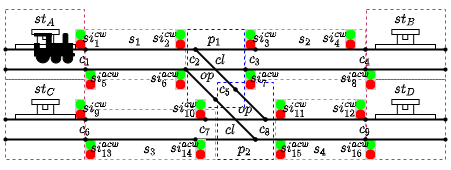

In [2]:
Image(filename='../../../Notes/images/Railway.drawio.png', width=800, height=500)

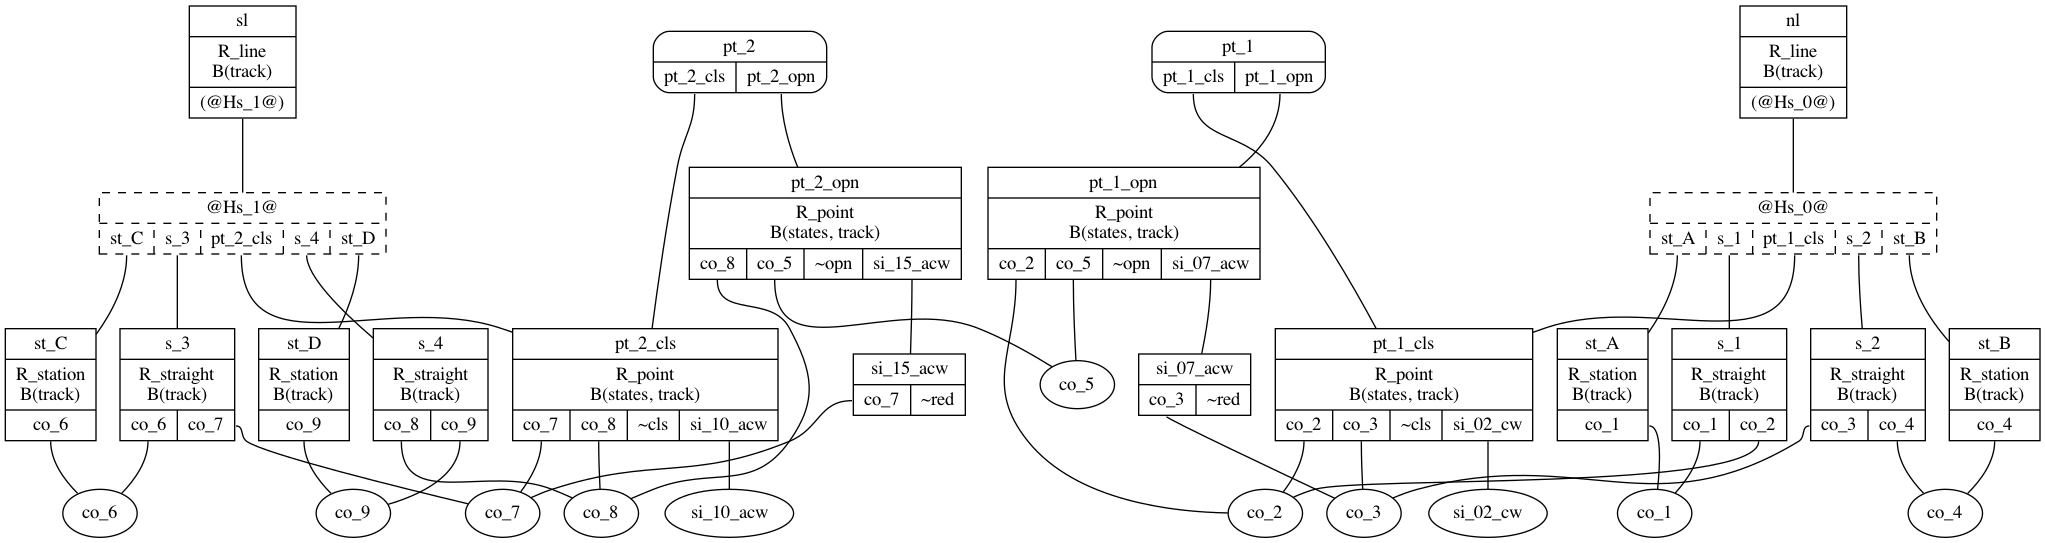

In [3]:
track = Hypernetwork()

compile_hn(track, parser, """
    pt_1={pt_1_cls=<co_2, co_3, ~cls, si_02_cw;  R_point>, pt_1_opn=<co_2, co_5, ~opn, si_07_acw=<co_3, ~red>; R_point>; B(track, states)}
    pt_2={pt_2_cls=<co_7, co_8, ~cls, si_10_acw; R_point>, pt_2_opn=<co_8, co_5, ~opn, si_15_acw=<co_7, ~red>; R_point>; B(track, states)}
    
    st_A=<co_1; R_station; B(track)>
    st_B=<co_4; R_station; B(track)>
    st_C=<co_6; R_station; B(track)>
    st_D=<co_9; R_station; B(track)>
    
    s_1=<co_1, co_2; R_straight; B(track)>
    s_2=<co_3, co_4; R_straight; B(track)>
    s_3=<co_6, co_7; R_straight; B(track)>
    s_4=<co_8, co_9; R_straight; B(track)>

    nl=<(st_A, s_1, pt_1_cls, s_2, st_B); R_line; B(track)>
    sl=<(st_C, s_3, pt_2_cls, s_4, st_D); R_line; B(track)>
    
    #in_1=<pt_1_opn, pt_2_opn; R_interchange; B(track)>
""")

draw_hn(track, fname="/tmp/track", view=False, direction="TB", split_camel=False)
Image(filename='/tmp/track.png', width=2000, height=500)

In [4]:
signals = Hypernetwork()

compile_hn(signals, parser, """
    si_01_cw=<co_1,  si_01_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_02_cw=<co_2,  si_02_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_03_cw=<co_3,  si_03_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_04_cw=<co_4,  si_04_cw_state={~red, ~grn}; R_signal; B(signals, states)>

    si_05_acw=<co_1, si_05_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_06_acw=<co_2, si_06_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_07_acw=<co_3, si_07_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_08_acw=<co_4, si_08_acw_state={~red, ~grn}; R_signal; B(signals, states)>

    si_09_cw=<co_6,  si_09_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_10_cw=<co_7,  si_10_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_11_cw=<co_9,  si_11_cw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_12_cw=<co_9,  si_12_cw_state={~red, ~grn}; R_signal; B(signals, states)>

    si_13_acw=<co_6, si_13_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_14_acw=<co_7, si_14_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_15_acw=<co_8, si_15_acw_state={~red, ~grn}; R_signal; B(signals, states)>
    si_16_acw=<co_9, si_16_acw_state={~red, ~grn}; R_signal; B(signals, states)>
""")

# draw_hn(signals, fname="/tmp/signals", view=False, split_camel=False)
# Image(filename='/tmp/signals.png', width=2000, height=400)

In [5]:
routes = Hypernetwork()

compile_hn(routes, parser, """
    AtoB=<st_A, s_1, pt_1_cl, s_2, st_B; R_route; B(routes)>
    BtoA=<st_B, s_2, pt_1_cl, s_1, st_A; R_route; B(routes)>
    CtoD=<st_C, s_3, pt_2_cl, s_4, st_D; R_route; B(routes)>
    DtoC=<st_D, s_4, pt_2_cl, s_3, st_C; R_route; B(routes)>
    
    AtoC=<st_A, s_1, in_1, s_4, pt_2_cl, s_3, st_C; R_route; B(routes)>
    CtoA=<st_C, s_3, pt_2_cl, s_4, in_1, s_1, st_A; R_route; B(routes)>
    
    BtoD=<st_B, s_2, pt_1_cl, s_1, in_1, s_4, st_D; R_route; B(routes)>
    DtoB=<st_D, s_4, in_1, s_1, pt_1_cl, s_2, st_B; R_route; B(routes)>
""")

# draw_hn(routes, fname="/tmp/routes", view=False, split_camel=False)
# Image(filename='/tmp/routes.png', width=2000, height=500)

pt_1_cls=<co_2, co_3, ~cls, si_02_cw; R_point; B(states, track)>
si_02_cw=<co_2, si_02_cw_state; R_signal; B(states, track, signals)>
si_07_acw=<co_3, si_07_acw_state; R_signal; B(states, track, signals)>
pt_1_opn=<co_2, co_5, ~opn, si_07_acw; R_point; B(states, track)>
pt_1={pt_1_cls, pt_1_opn; B(states, track)}
pt_2_cls=<co_7, co_8, ~cls, si_10_acw; R_point; B(states, track)>
si_15_acw=<co_8, si_15_acw_state; R_signal; B(states, track, signals)>
pt_2_opn=<co_8, co_5, ~opn, si_15_acw; R_point; B(states, track)>
pt_2={pt_2_cls, pt_2_opn; B(states, track)}
st_A=<co_1; R_station; B(track)>
st_B=<co_4; R_station; B(track)>
st_C=<co_6; R_station; B(track)>
st_D=<co_9; R_station; B(track)>
s_1=<co_1, co_2; R_straight; B(track)>
s_2=<co_3, co_4; R_straight; B(track)>
s_3=<co_6, co_7; R_straight; B(track)>
s_4=<co_8, co_9; R_straight; B(track)>
@Hs_0@=
nl=<@Hs_0@; R_line; B(track)>
@Hs_1@=
sl=<@Hs_1@; R_line; B(track)>
si_01_cw_state={~red, ~grn; B(states, signals)}
si_01_cw=<co_1, si_01_cw_s

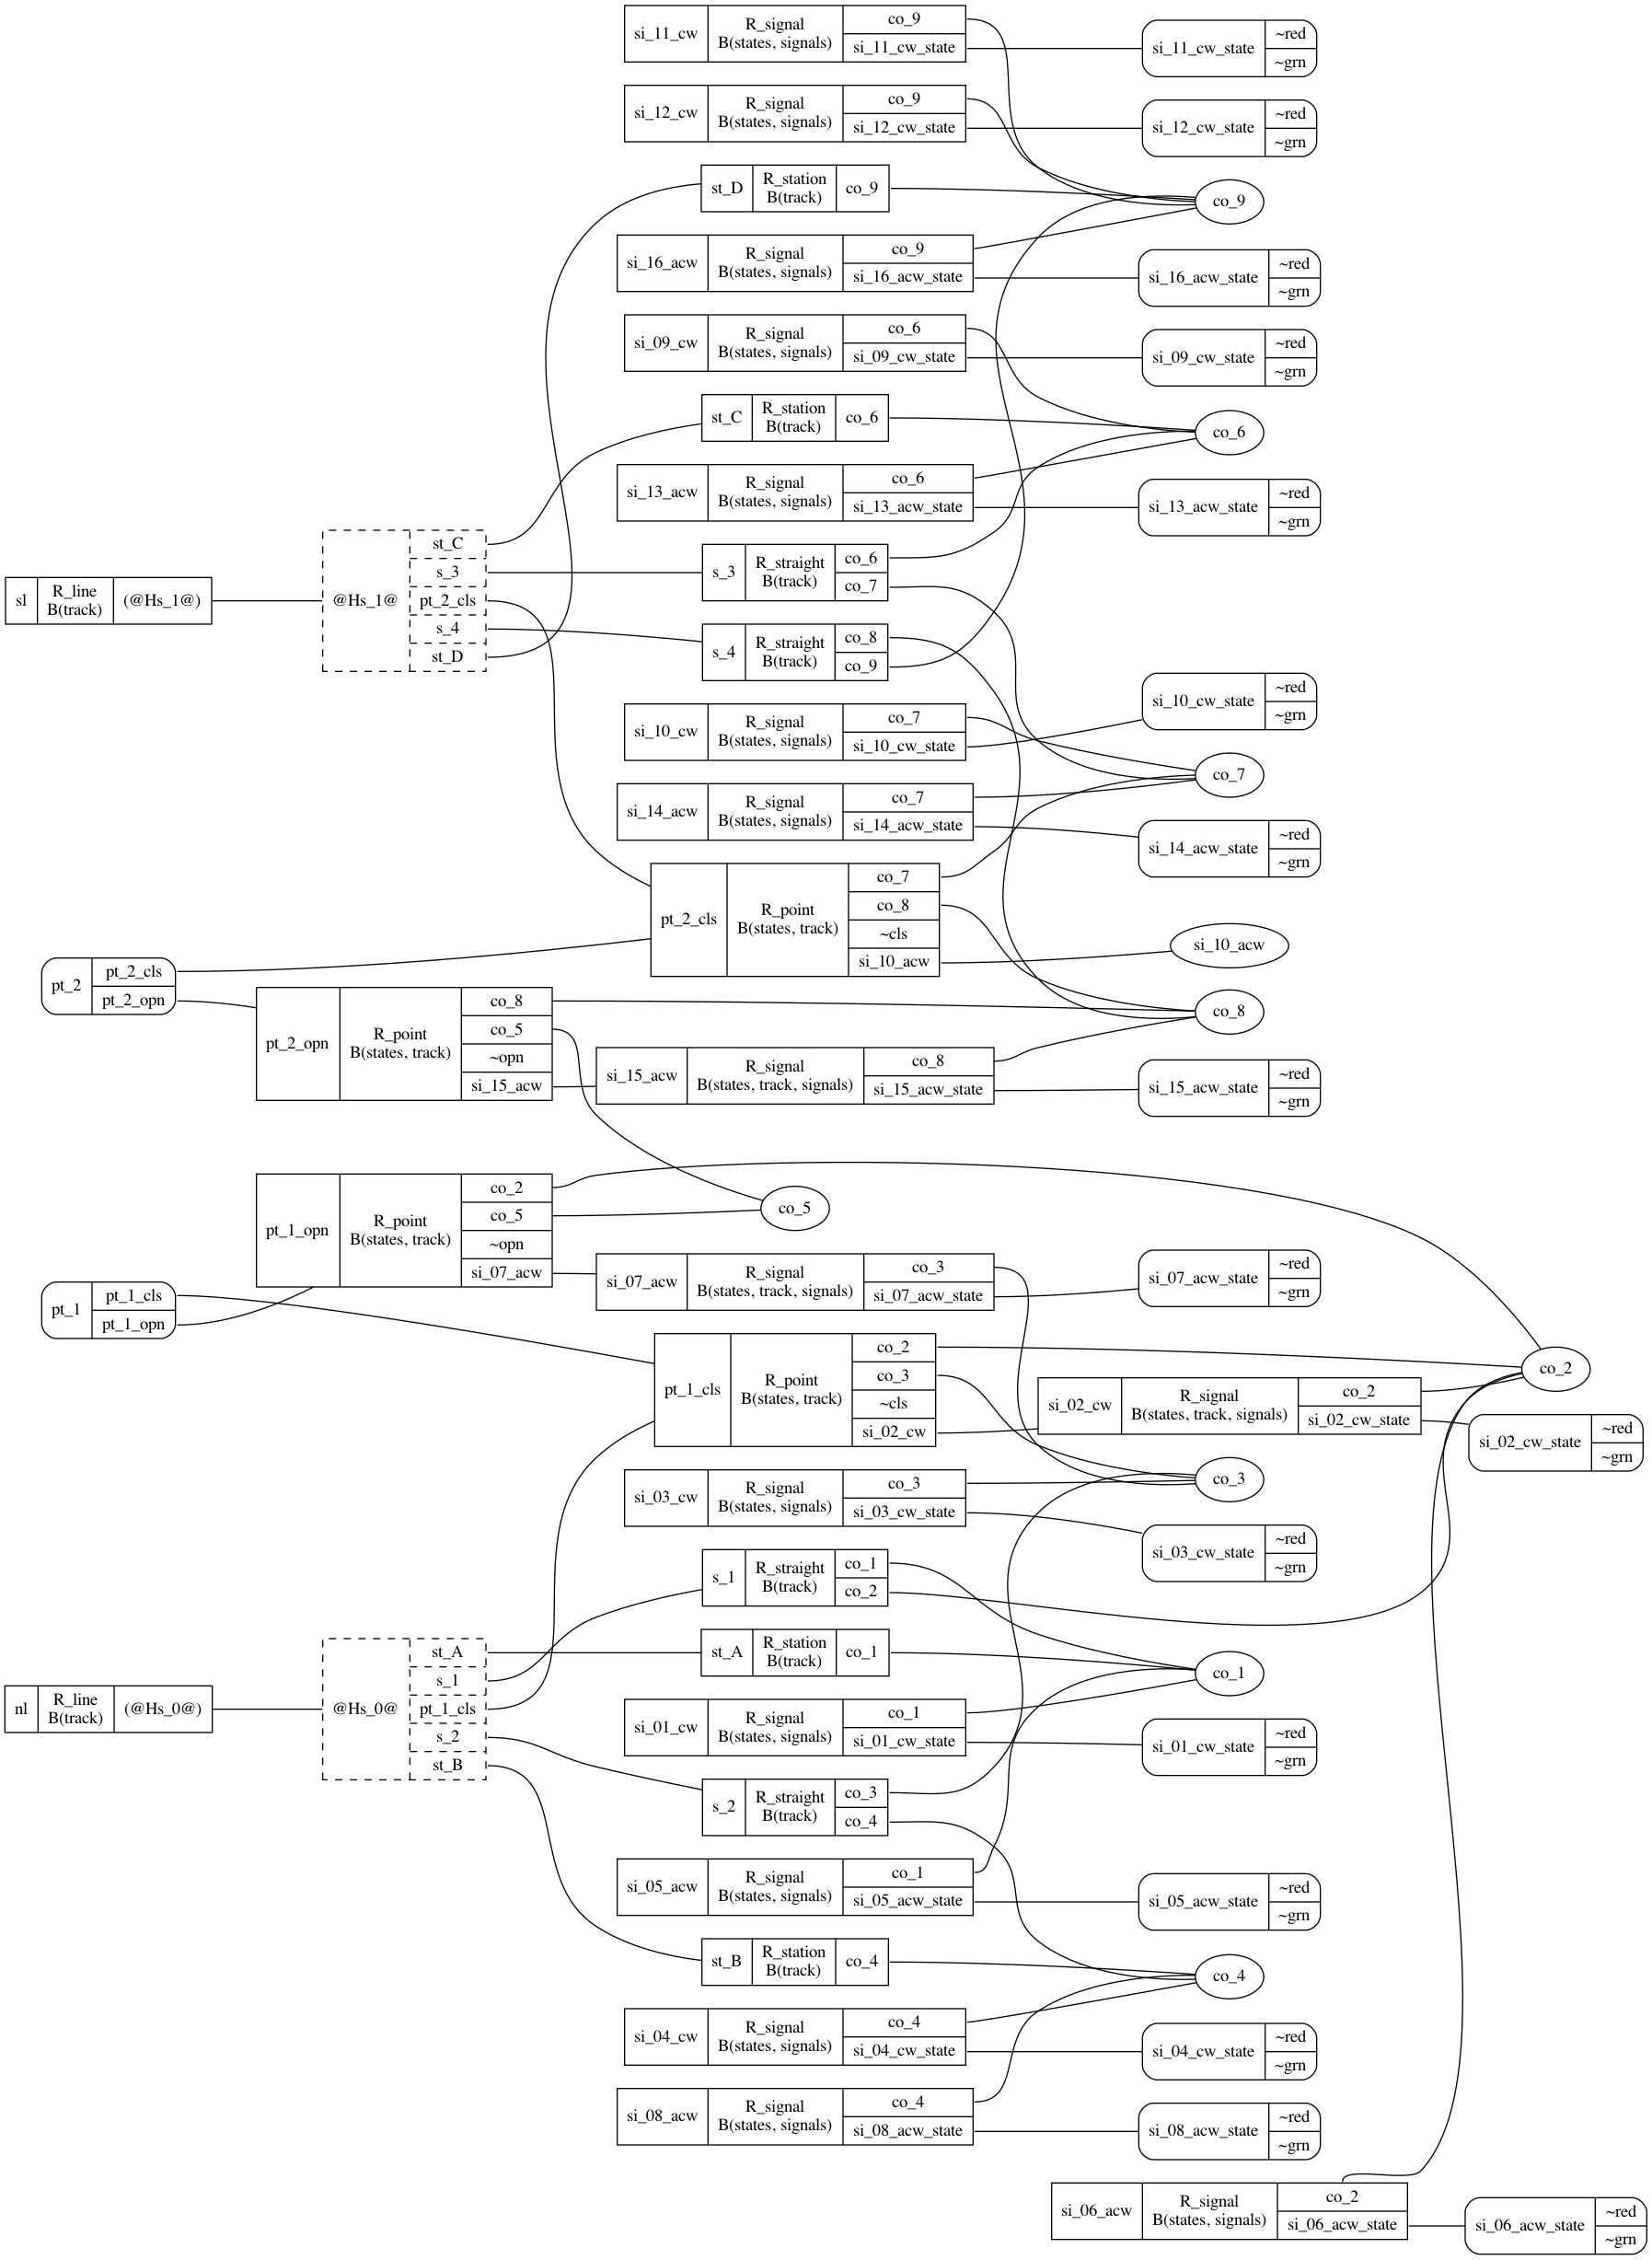

In [6]:
railway = Hypernetwork()

railway.union(track)
railway.union(signals)

print(railway)

draw_hn(railway, fname="/tmp/railway", view=True, direction="LR", split_camel=False)
Image(filename='/tmp/railway.png', width=2000, height=500)

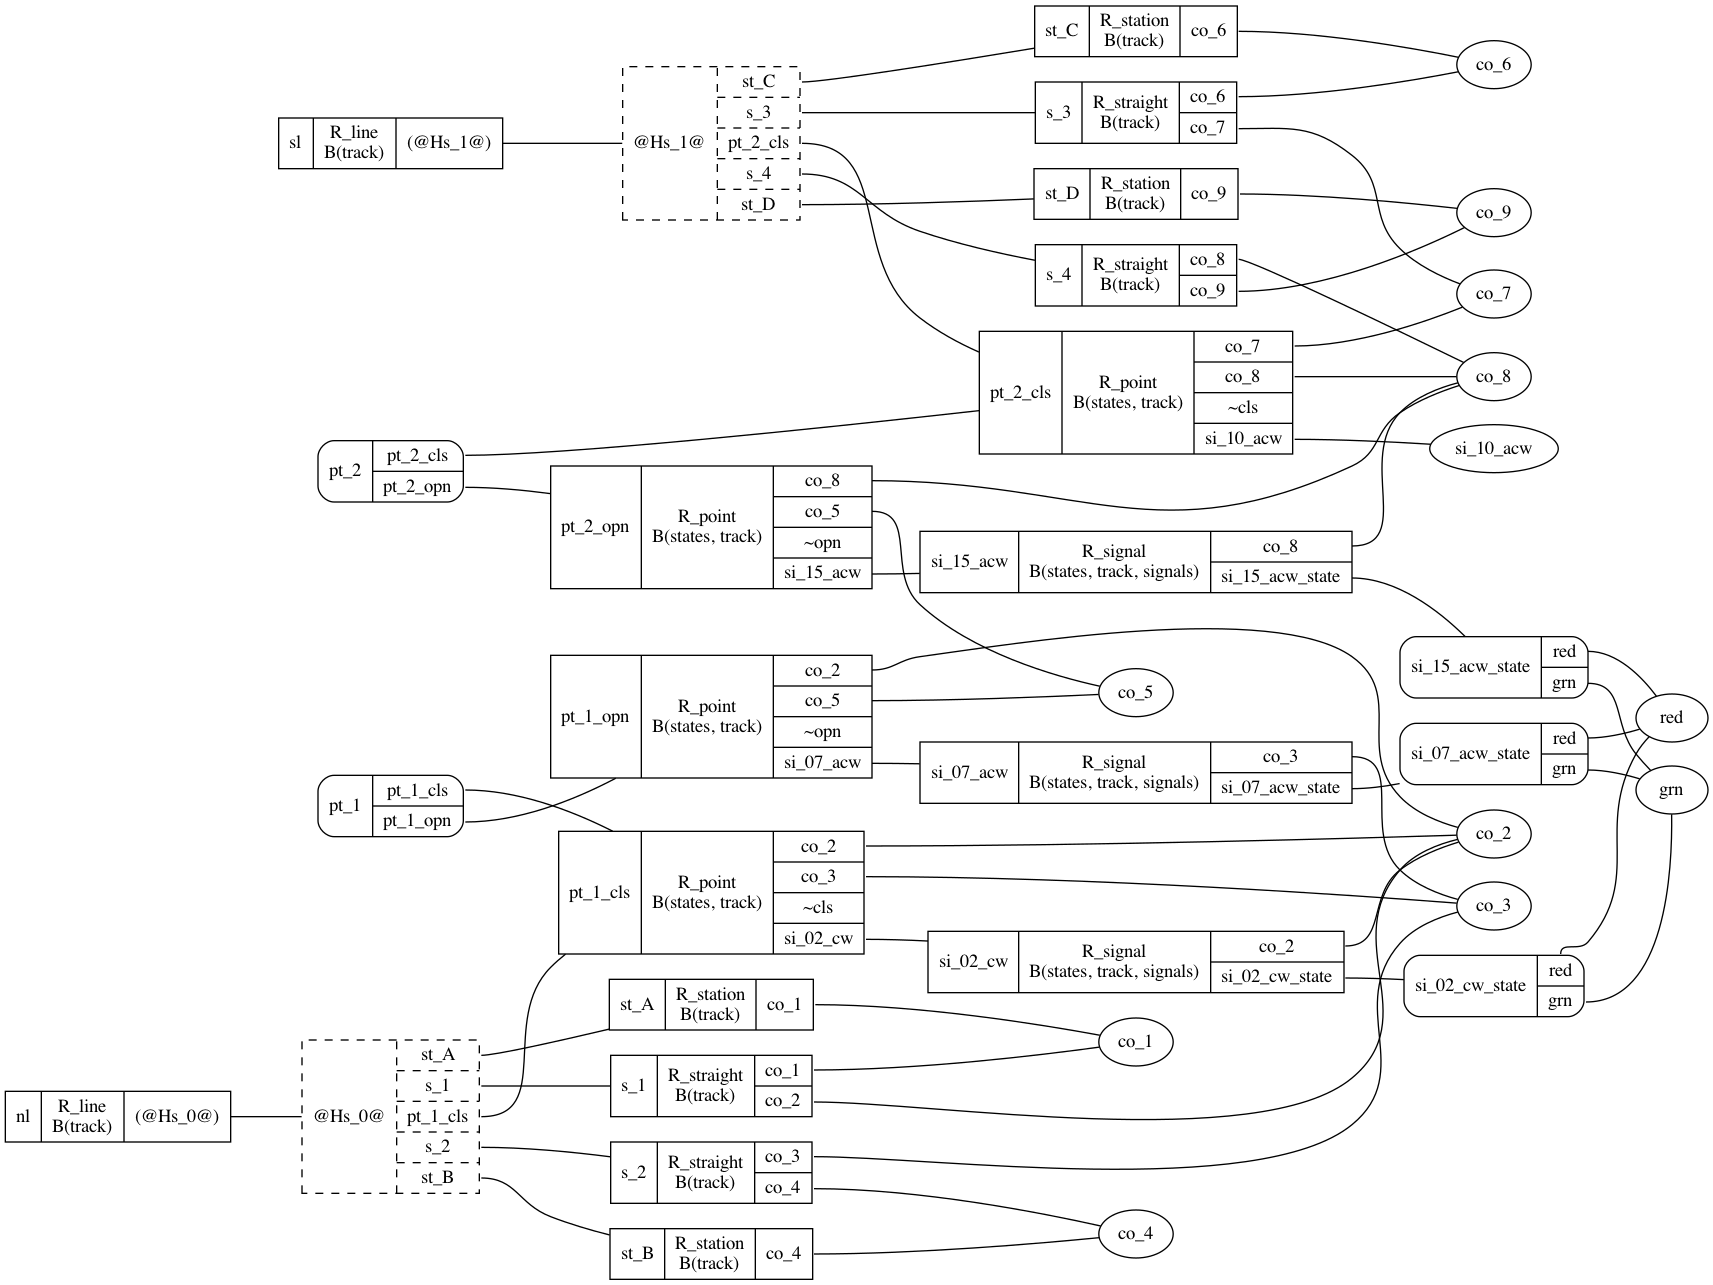

In [7]:
states = Hypernetwork()

states = get_subHn_by_semantic_boundary(railway, "track", states)

draw_hn(states, fname="/tmp/states", view=False, direction="LR", split_camel=False)
Image(filename='/tmp/states.png', width=800, height=500)

Add routes to the railway.

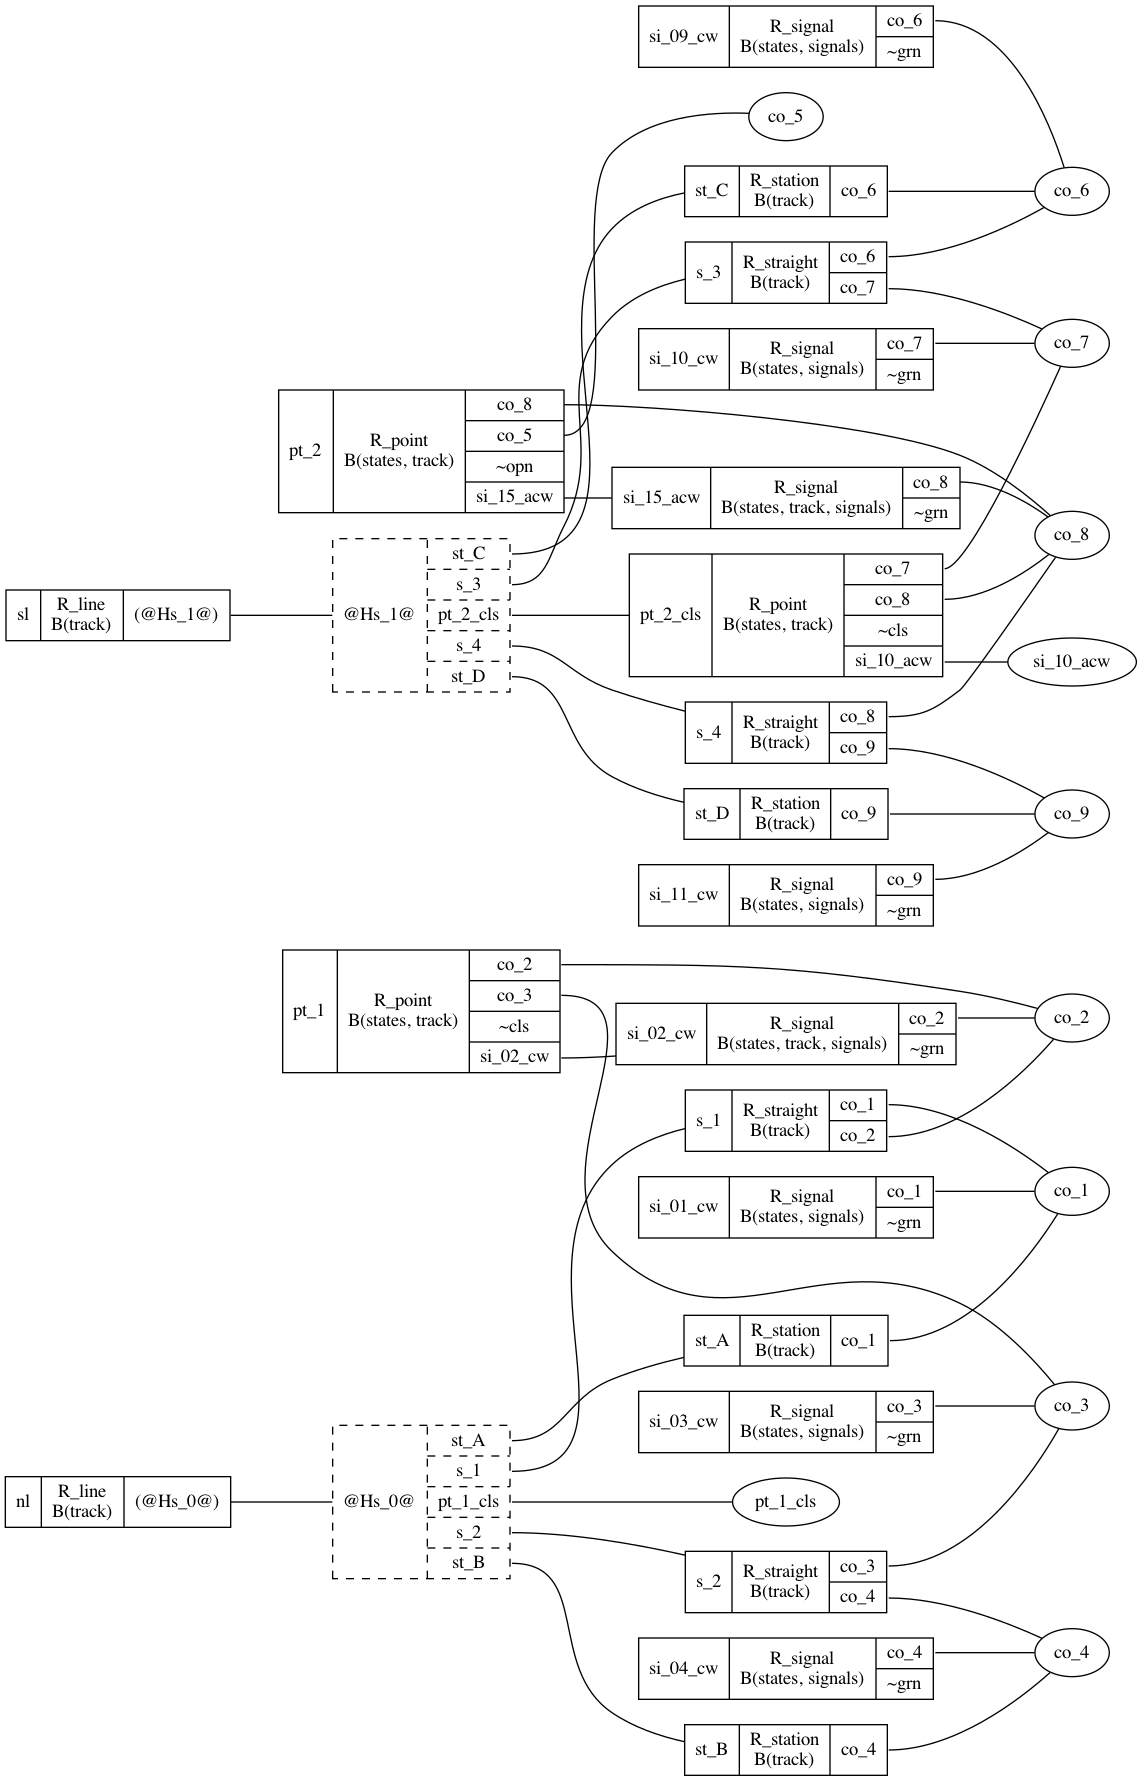

In [8]:
state_settings = {
    "si_01_cw_state":  "grn",
    "si_02_cw_state":  "grn",
    "si_03_cw_state":  "grn",
    "si_04_cw_state":  "grn",
    "si_05_acw_state": "grn",
    "si_06_acw_state": "grn",
    "si_07_acw_state": "grn",
    "si_08_acw_state": "grn",
    
    "si_09_cw_state":  "grn",
    "si_10_cw_state":  "grn",
    "si_11_cw_state":  "grn",
    "si_12_cw_state":  "grn",
    "si_13_acw_state": "grn",
    "si_14_acw_state": "grn",
    "si_15_acw_state": "grn",
    "si_16_acw_state": "grn",

    "pt_1": "pt_1_cls", 
    "pt_2": "pt_2_opn"
}


def dyns_simple(hn, state):
    new_hn = Hypernetwork()

    def _dyns_simple(name, new_name=""):
        hs = hn.hypernetwork[name]
        
        if hs.hstype in [BETA]:
            if name in state:
                _dyns_simple(state[name], name)
            else:
                print("NOT FOUND", name)
            
        elif hs.hstype in [ALPHA, UNION_ALPHA, IMMUTABLE_ALPHA, SEQUENCE]:
            temp_simplex=[state[v] if v in state else v for v in hs.simplex]
            new_hn.insert(vertex=new_name if new_name else name, hs_class=hs.hs_class, 
                          hstype=hs.hstype, simplex=temp_simplex,
                          R=hs.R, t=hs.t, C=hs.C, B=hs.B,
                          psi=hs.psi, psi_inv=hs.psi_inv, phi=hs.phi, phi_inv=hs.phi_inv,
                          traffic=hs.traffic, coloured=hs.coloured)

            for vert in hs.simplex:
                _dyns_simple(vert, vert)
                
        else:
            new_hn.insert(vertex=name, hs_class=hs.hs_class, hstype=hs.hstype, simplex=hs.simplex,
                          R=hs.R, t=hs.t, C=hs.C, B=hs.B,
                          psi=hs.psi, psi_inv=hs.psi_inv, phi=hs.phi, phi_inv=hs.phi_inv,
                          traffic=hs.traffic, coloured=hs.coloured)
    # END _dyns_simple
    
    peaks = get_peaks(hn)
    
    for peak in peaks:
        _dyns_simple(peak)
        
    return new_hn
        

dyns_hn = dyns_simple(railway, state_settings)

draw_hn(dyns_hn, fname="/tmp/dyns_hn", view=True, direction="LR", split_camel=False)
Image(filename='/tmp/dyns_hn.png', width=700, height=500)